In [9]:
import pandas as pd
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_colwidth",None)
pd.set_option("display.max_rows",21)
import warnings
warnings.filterwarnings("ignore")

# Project
## World Population Analysis 

In [10]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\world_population.csv")

# Data Info

In [11]:
df.shape

(234, 17)

In [12]:
df.head()

,Rank,CCA3,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


# Data Cleaning & Handling

In [13]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

In [14]:
df.drop(columns=["CCA3"],inplace=True)

# Data Visualization

In [15]:
df.head()

,Rank,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage
0,36,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52
1,138,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04
2,34,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56
3,213,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00
4,203,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00


In [16]:
def new_col(row):
    if row["2022 Population"] > row["2020 Population"]:
        return row["2022 Population"] - row["2020 Population"]
    else:
        return row["2020 Population"] - row["2022 Population"]

df["Population Change"] = df.apply(new_col, axis=1)
df.head()


,Rank,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Population Change
0,36,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,2156541
1,138,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,24528
2,34,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,1451559
3,213,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,1916
4,203,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,2124


## Population density per kilometer by country

In [17]:
fig=px.bar(df,x="Country",y="Density (per km²)",hover_data=["Rank","Continent","Capital",'Area (km²)'],title="Population density per kilometer by country")
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Rank', 'Country/Territory', 'Capital', 'Continent', '2022 Population', '2020 Population', '2015 Population', '2010 Population', '2000 Population', '1990 Population', '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate', 'World Population Percentage', 'Population Change'] but received: Country

## Last 2 years population difference

In [ ]:
fig=px.bar(df,x="Country",y="Population Change",title="Last 2 years population differences")
fig.show()

# Rank by population

In [ ]:
popu_c=df[['2022 Population', '2020 Population', '2015 Population',
          '2010 Population', '2000 Population', '1990 Population',
          '1980 Population', '1970 Population',]]

In [ ]:
df=df.rename({"Country/Territory":"Country"},axis=1)

In [ ]:
for col in popu_c.columns:
    fig=px.line(df,x="Country",y=col,title='Population By Countries',hover_data=["Rank"])
    fig.show()

In [ ]:
df.head()

,Rank,CCA3,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Population Change
0,36,AFG,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,2156541
1,138,ALB,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,24528
2,34,DZA,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,1451559
3,213,ASM,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,1916
4,203,AND,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,2124


## Population Growth Rate 

In [ ]:
fig=px.bar(df,x="Continent",y="Growth Rate",hover_data=["Population Change","Country"])
fig.show()

## Total population by continent 

In [ ]:
to_p=df.groupby("Continent")['2022 Population'].sum().sort_values(ascending=False).reset_index()
to_p

,Continent,2022 Population
0,Asia,4721383274
1,Africa,1426730932
2,Europe,743147538
3,North America,600296136
4,South America,436816608
5,Oceania,45038554


In [ ]:
fig=px.bar(to_p,x="Continent",y="2022 Population",title="Total 2022 population by continent ")
fig.show()


In [ ]:
df.head()

,Rank,Country,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Population Change
0,36,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,2156541
1,138,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,24528
2,34,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,1451559
3,213,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,1916
4,203,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,2124


In [ ]:
df.columns

Index(['Rank', 'Country', 'Capital', 'Continent', '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population', 'Area (km²)', 'Density (per km²)', 'Growth Rate',
       'World Population Percentage', 'Population Change'],
      dtype='object')

In [ ]:
popu_g=df.groupby("Country")[[ '2022 Population',
       '2020 Population', '2015 Population', '2010 Population',
       '2000 Population', '1990 Population', '1980 Population',
       '1970 Population']].sum().reset_index()
popu_g.style.background_gradient(cmap="Reds")

,Country,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population
0,Afghanistan,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971
1,Albania,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731
2,Algeria,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915
3,American Samoa,44273,46189,51368,54849,58230,47818,32886,27075
4,Andorra,79824,77700,71746,71519,66097,53569,35611,19860
5,Angola,35588987,33428485,28127721,23364185,16394062,11828638,8330047,6029700
6,Anguilla,15857,15585,14525,13172,11047,8316,6560,6283
7,Antigua and Barbuda,93763,92664,89941,85695,75055,63328,64888,64516
8,Argentina,45510318,45036032,43257065,41100123,37070774,32637657,28024803,23842803
9,Armenia,2780469,2805608,2878595,2946293,3168523,3556539,3135123,2534377


In [ ]:
popu_g
for cols in popu_g.columns:
    if cols!="Country":
        fig=px.line(popu_g,x="Country",y=cols,hover_data=["Country"],title="Population ups-downs by country")
        fig.show()



## Population growth rate by continent

In [ ]:
gr_c=df.groupby("Continent")["Growth Rate"].sum().sort_values(ascending=False).reset_index()
gr_c

,Continent,Growth Rate
0,Africa,58.2109
1,Asia,50.4692
2,Europe,50.1128
3,North America,40.1670
4,Oceania,23.1698
5,South America,14.1114


In [ ]:
fig=px.bar(gr_c,x="Continent",y="Growth Rate",title="Population growth rate by continent")
fig.show()

## Correlation Heatmap

In [19]:
df.head()

,Rank,Country/Territory,Capital,Continent,2022 Population,2020 Population,2015 Population,2010 Population,2000 Population,1990 Population,1980 Population,1970 Population,Area (km²),Density (per km²),Growth Rate,World Population Percentage,Population Change
0,36,Afghanistan,Kabul,Asia,41128771,38972230,33753499,28189672,19542982,10694796,12486631,10752971,652230,63.0587,1.0257,0.52,2156541
1,138,Albania,Tirana,Europe,2842321,2866849,2882481,2913399,3182021,3295066,2941651,2324731,28748,98.8702,0.9957,0.04,24528
2,34,Algeria,Algiers,Africa,44903225,43451666,39543154,35856344,30774621,25518074,18739378,13795915,2381741,18.8531,1.0164,0.56,1451559
3,213,American Samoa,Pago Pago,Oceania,44273,46189,51368,54849,58230,47818,32886,27075,199,222.4774,0.9831,0.00,1916
4,203,Andorra,Andorra la Vella,Europe,79824,77700,71746,71519,66097,53569,35611,19860,468,170.5641,1.0100,0.00,2124


<Figure size 1200x600 with 0 Axes>

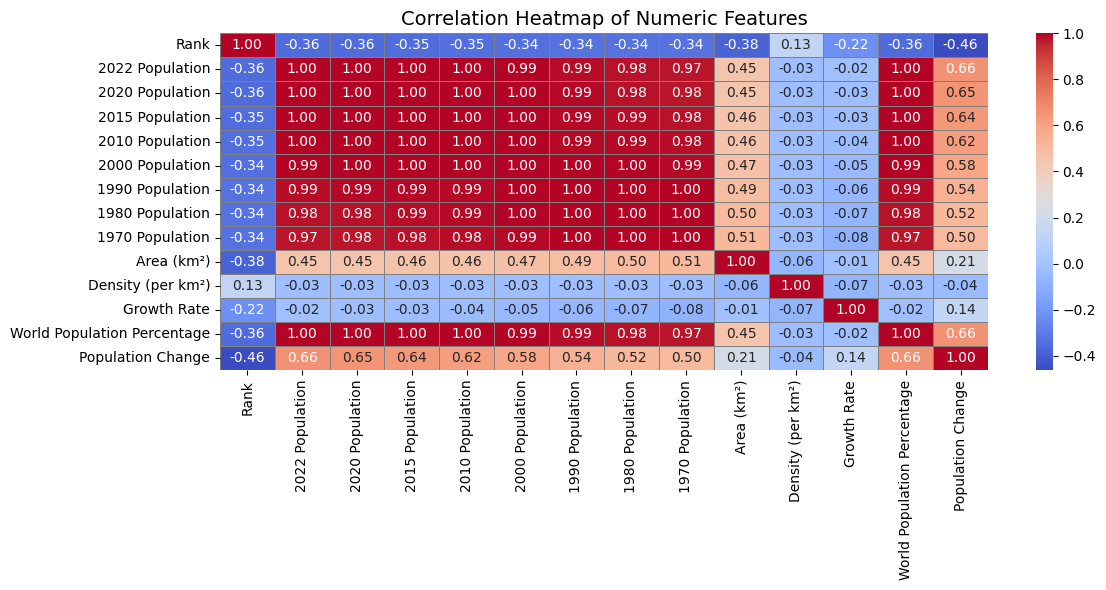

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.select_dtypes(include="number").corr()

# Set up the figure
plt.figure(figsize=(12, 6))

# Draw the heatmap
sns.heatmap(data=corr, 
            annot=True,          
            fmt=".2f",            
            cmap="coolwarm",    
            linewidths=0.5,       
            linecolor='gray')

plt.title("Correlation Heatmap of Numeric Features", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
